In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


import h5py
#from read_raw import load_from_file
import maxlab_analysis as mla

import time
from scipy.signal import find_peaks
import scipy.stats as stats
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE


# PCA 50 dimensions

In [2]:
filestem = "div21"
filename = filestem + ".data.raw.h5"

In [3]:
X = np.load(filename + '.npy')
t = X[:, 0]
X = X[:, 1:]
print(X)

[[0.00322895 0.00331707 0.00326672 ... 0.00326672 0.00324783 0.00325413]
 [0.00323524 0.00330448 0.00325413 ... 0.00325413 0.00325413 0.00325413]
 [0.00323524 0.00330448 0.00326042 ... 0.00326672 0.00325413 0.00326042]
 ...
 [0.00320377 0.00326672 0.00319748 ... 0.00322895 0.00323524 0.00324783]
 [0.00321007 0.00327301 0.00321636 ... 0.00321636 0.00323524 0.00326672]
 [0.00319748 0.00326042 0.00321007 ... 0.00320377 0.00322266 0.00322895]]


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

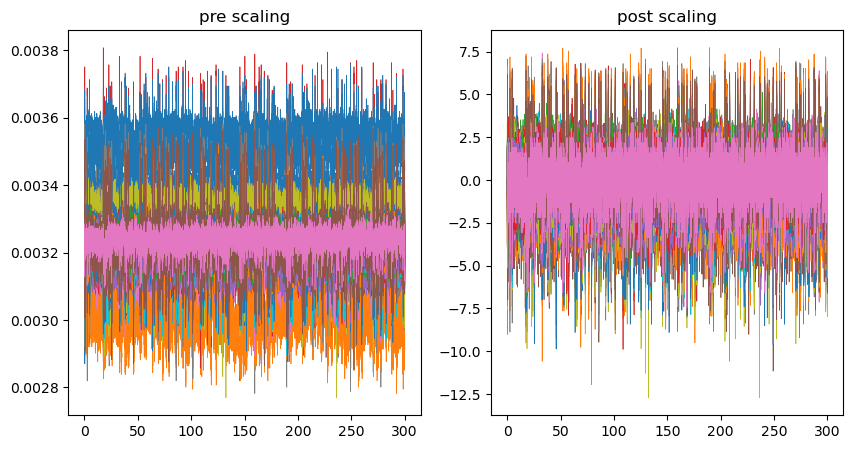

In [5]:
#Plot a subset of the channels
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.plot(t[:], X[:, ::10], linewidth = 0.5)
plt.title('pre scaling')

plt.subplot(122)
plt.plot(t[:], X_scaled[:, ::10], linewidth = 0.5)
plt.title('post scaling')
plt.show()

[0.386333   0.05145563 0.01607013 0.01055963 0.00473972 0.00289904
 0.00274272 0.0022996  0.00221759 0.00209754]


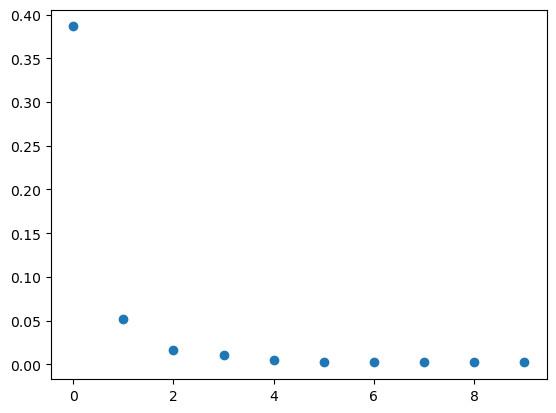

In [6]:
n_components = 10

pca = PCA(n_components)
X_pca = pca.fit_transform(X_scaled)

print(pca.explained_variance_ratio_)
plt.scatter(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)


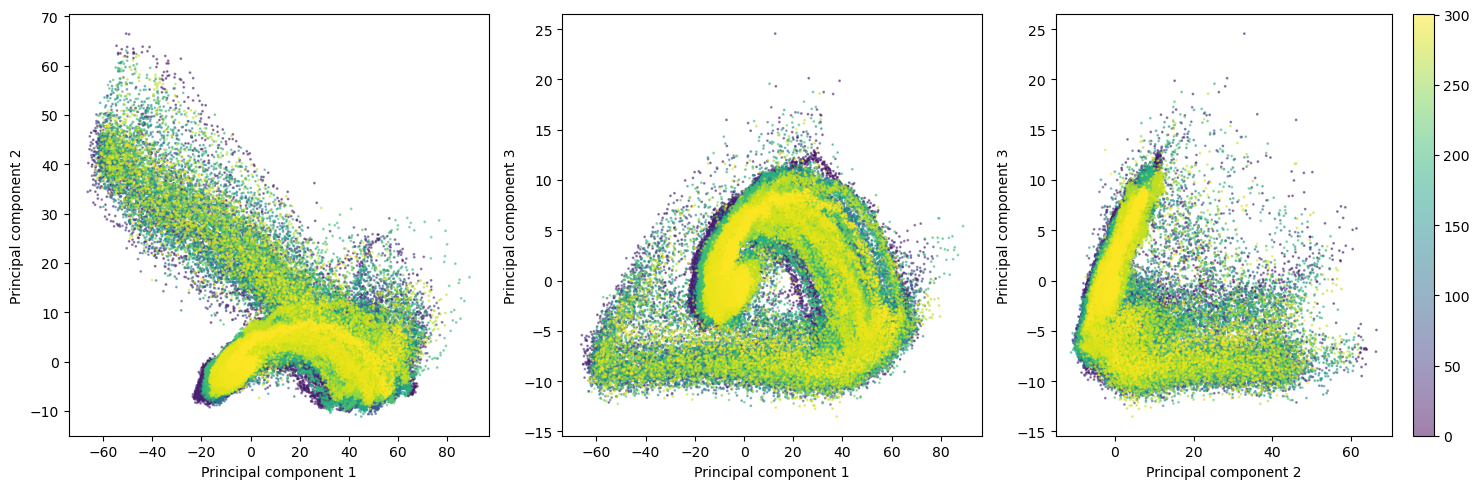

In [7]:
%matplotlib inline
fig = plt.figure(figsize = (15, 5))

plt.subplot(131)

plt.scatter(X_pca[:, 0], X_pca[:, 1],  s = 1, c = t, alpha = 0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

plt.subplot(132)

plt.scatter(X_pca[:, 0], X_pca[:, 2],  s = 1, c = t, alpha = 0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 3')

plt.subplot(133)
plt.scatter(X_pca[:, 1], X_pca[:, 2],  s = 1, c = t, alpha = 0.5)
plt.colorbar()
plt.xlabel('Principal component 2')
plt.ylabel('Principal component 3')
plt.tight_layout()
plt.show()

In [10]:
tsne = TSNE()
X_tsne = list()

for i, perplexity in enumerate(np.arange(5, 80, 5)):
    tsne = TSNE(perplexity = perplexity)
    X_tsne.append(tsne.fit_transform(X_pca))

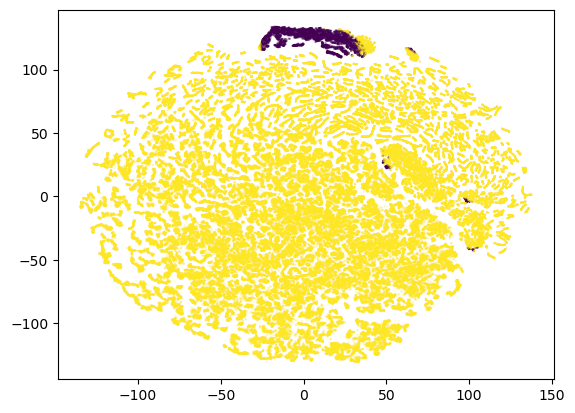

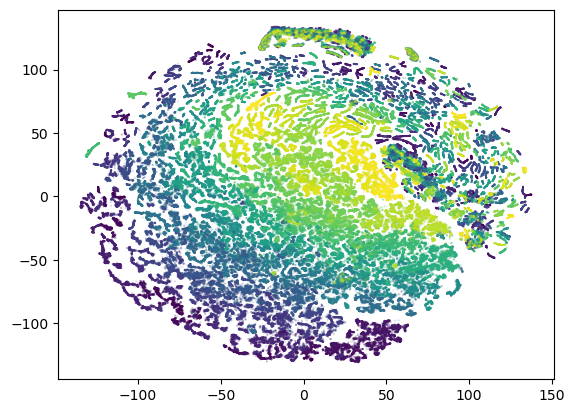

In [24]:
i=13
plt.scatter(X_tsne[i][:, 0], X_tsne[i][:, 1], s = 0.2, alpha=0.2, c = (X_pca[:, 1] < 20))
plt.show()
plt.scatter(X_tsne[i][:, 0], X_tsne[i][:, 1], s = 0.2, alpha=0.2, c = t)
plt.show()

In [25]:
X_tsne_2 = list()

for i, perplexity in enumerate(np.arange(80, 300, 10)):
    tsne = TSNE(perplexity = perplexity)
    X_tsne_2.append(tsne.fit_transform(X_pca))

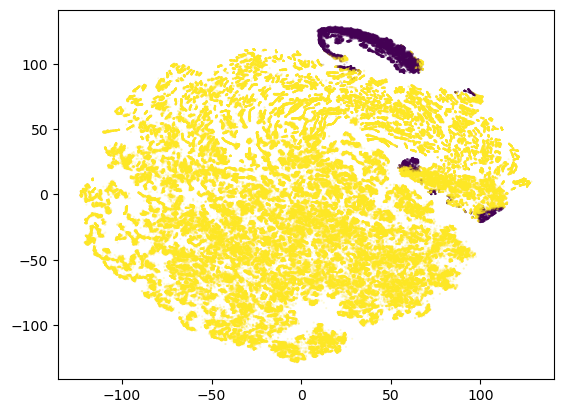

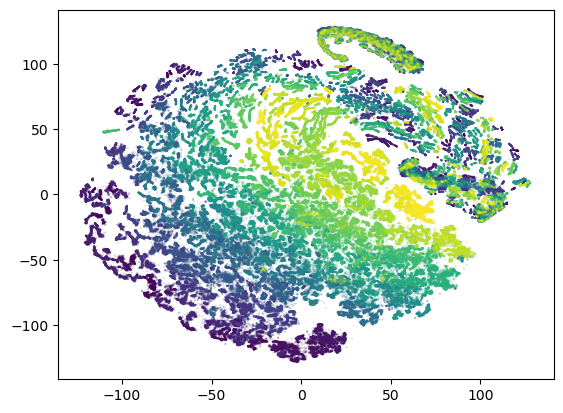

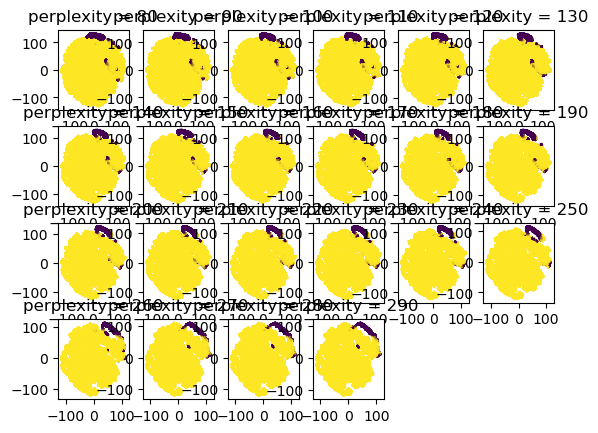

In [44]:
i=9
plt.scatter(X_tsne_2[i][:, 0], X_tsne_2[i][:, 1], s = 0.2, alpha=0.2, c = (X_pca[:, 1] < 10))
plt.show()
plt.scatter(X_tsne_2[i][:, 0], X_tsne_2[i][:, 1], s = 0.2, alpha=0.2, c = t)
plt.show()

fig = plt.figure(figsize = (20, 20))
for i, perplexity in enumerate(np.arange(80, 300, 10)):
    plt.subplot(4, 6, i+1)
    plt.scatter(X_tsne_2[i][:, 0], X_tsne_2[i][:, 1], s = 0.2, alpha=0.2, c = (t))
    plt.title('perplexity = ' + str(perplexity))

plt.tight_layout()
plt.show()